# State/UT-wise Details Of Assembly Segment of (PC- Parliamentary Constituency)
- This dataset contains detailed electoral information at both the Parliamentary Constituency (PC) and Assembly Constituency (AC) levels across various states and union territories in India. It includes data on total electors, valid votes, NOTA votes, candidate details, and party-wise performance, making it useful for analyzing voter behavior, party dominance, and electoral trends.

# Objectives - 
1. Analyze Voter Turnout – Examine the participation rate across different states and constituencies.

2. Study Party-wise Performance 

3. Regional Voting Patterns

4. Assess NOTA Impact – Understand the significance of "None of the Above" (NOTA) votes.

5. Analyze Vote Share Distribution

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [116]:
df = pd.read_csv("C:\\Users\\ganam\\Downloads\\34_Details_Of_Assembly_Segment_Of_PC.csv")

# Data Cleaning and Preprocessing

- this is very important to know the information about the dataset -> about the columns 

In [117]:
# this will show the first 5 rows of the dataframe
df.head(5)

,State/Ut Name,Pc No,PC Name,Total Electors In PC,AC No,AC Name,Total Electors In AC,Total Valid Votes In State,Nota Votes Evm In AC,Candidate Name,Party,Votes Secured Evm
0,Andhra Pradesh,1,Araku,1557153,10,Palakonda,195673,33327256,4441,APPALANARASA PACHIPENTA,CPI(M),3873
1,Andhra Pradesh,1,Araku,1557153,10,Palakonda,195673,33327256,4441,AVASHYA LAHARI . VARAM,BSP,1155
2,Andhra Pradesh,1,Araku,1557153,10,Palakonda,195673,33327256,4441,KOTHAPALLI GEETHA,BJP,66695
3,Andhra Pradesh,1,Araku,1557153,10,Palakonda,195673,33327256,4441,GUMMA THANUJA RANI,YSRCP,63302
4,Andhra Pradesh,1,Araku,1557153,10,Palakonda,195673,33327256,4441,CHANTI BADNAINA,JBNP,1977


In [118]:
# to know the information about the columns and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61725 entries, 0 to 61724
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   State/Ut Name               61725 non-null  object
 1   Pc No                       61725 non-null  int64 
 2   PC Name                     61725 non-null  object
 3   Total Electors In PC        61725 non-null  int64 
 4   AC No                       61725 non-null  int64 
 5   AC Name                     61725 non-null  object
 6   Total Electors In AC        61725 non-null  int64 
 7   Total Valid Votes In State  61725 non-null  int64 
 8   Nota Votes Evm In AC        61725 non-null  int64 
 9   Candidate Name              61725 non-null  object
 10  Party                       61725 non-null  object
 11  Votes Secured Evm           61725 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 5.7+ MB


In [119]:
# it is important to know that there is any missing values in the dataset or not 
df.isnull().sum()

State/Ut Name                 0
Pc No                         0
PC Name                       0
Total Electors In PC          0
AC No                         0
AC Name                       0
Total Electors In AC          0
Total Valid Votes In State    0
Nota Votes Evm In AC          0
Candidate Name                0
Party                         0
Votes Secured Evm             0
dtype: int64

- From above we can see there are no missing values in the dataset 

In [120]:
unique_states = df["State/Ut Name"].nunique()
print("Unique states in the dataset: ",unique_states)
unique_parties = df["Party"].nunique()
print("Unique parties in the dataset: ", unique_parties)

Unique states in the dataset:  36
Unique parties in the dataset:  744


In [121]:
# for stats of numerical columns
df.describe()

,Pc No,Total Electors In PC,AC No,Total Electors In AC,Total Valid Votes In State,Nota Votes Evm In AC,Votes Secured Evm
count,61725.000000,6.172500e+04,61725.000000,6.172500e+04,6.172500e+04,61725.000000,61725.000000
mean,15.002122,1.809081e+06,96.972232,2.493684e+05,3.481427e+07,1414.826731,10292.298177
std,14.124969,3.833289e+05,78.021338,1.001638e+05,2.244040e+07,1675.501488,26505.544716
min,1.000000,5.795300e+04,1.000000,0.000000e+00,4.906700e+04,0.000000,0.000000
25%,4.000000,1.623852e+06,35.000000,2.055210e+05,1.704652e+07,552.000000,118.000000
50%,11.000000,1.810090e+06,76.000000,2.489410e+05,3.332726e+07,1032.000000,317.000000
75%,22.000000,2.005278e+06,142.000000,3.007160e+05,4.320698e+07,1824.000000,1157.000000
max,80.000000,3.780453e+06,403.000000,1.054464e+06,8.727479e+07,53133.000000,311036.000000


## Data Visualization 

In [153]:
import matplotlib.ticker as ticker

1. Voter Turnout 

- this will help tounderstand the typical range of voter turnout

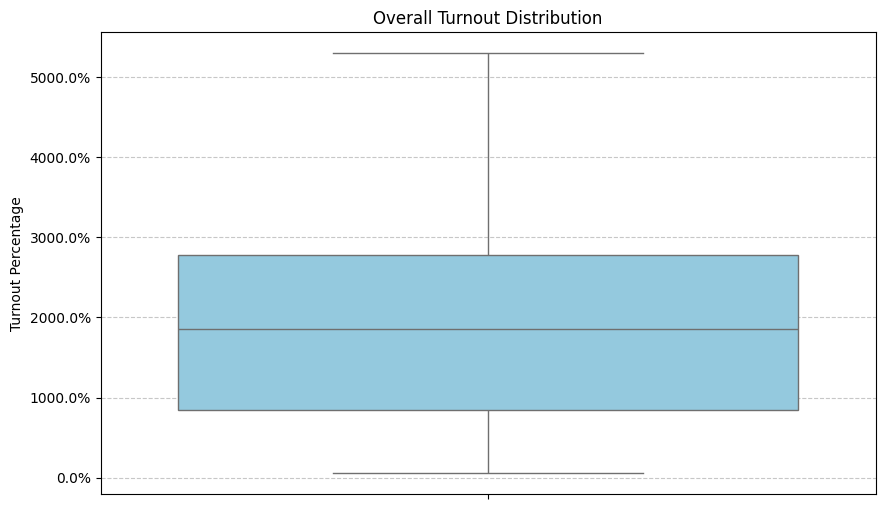

In [128]:

plt.figure(figsize=(10 ,6))
sns.boxplot(y=df['Turnout Percentage'], color='skyblue')
plt.title('Overall Turnout Distribution')
plt.ylabel('Turnout Percentage')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Party wise Performace 

- WE ARE VISUALIZING THE TOP 10 PERFORMING PARTIES 

C:\Users\ganam\AppData\Local\Temp\ipykernel_26568\1807393823.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= party_votes.index, y= party_votes.values/1000000, palette='viridis')


Text(0.5, 1.0, 'Top Performing Parties')

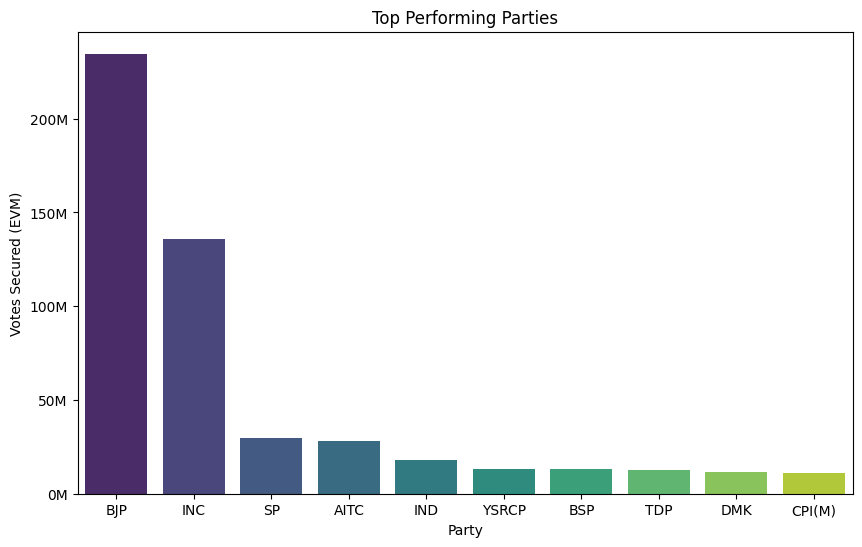

In [133]:
party_votes = df.groupby('Party')['Votes Secured Evm'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x= party_votes.index, y= party_votes.values/1000000, palette='viridis')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.ylabel('Votes Secured (EVM)')
plt.xlabel('Party')
plt.title('Top Performing Parties')



3. REGIONAL VOTING PATTERNS 

Regional Analysis:
-  Grouped states into major regions (North, South, East, West, Central)


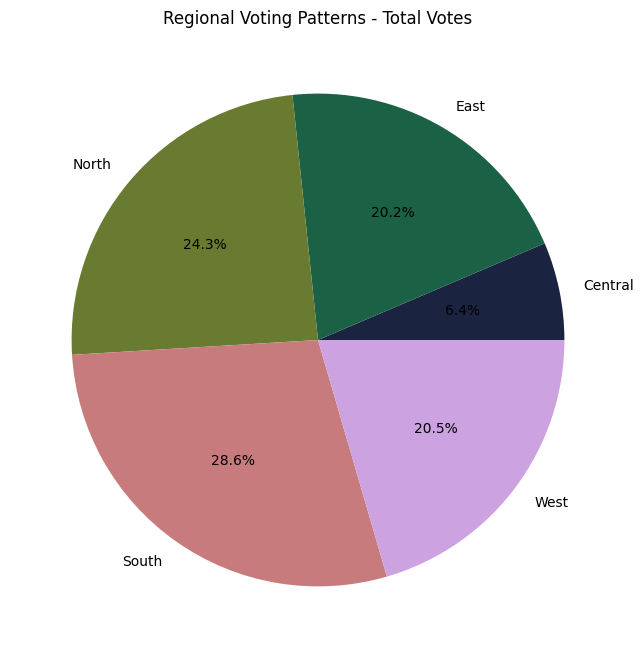

In [ ]:
# states into regions
region_mapping = {
    'Jammu & Kashmir': 'North', 'Himachal Pradesh': 'North', 'Punjab': 'North', 'Haryana': 'North',
    'Uttarakhand': 'North', 'Delhi': 'North', 'Rajasthan': 'North', 'Uttar Pradesh': 'North',
    'Bihar': 'East', 'West Bengal': 'East', 'Odisha': 'East', 'Jharkhand': 'East',
    'Assam': 'East', 'Sikkim': 'East', 'Arunachal Pradesh': 'East', 'Nagaland': 'East',
    'Manipur': 'East', 'Mizoram': 'East', 'Tripura': 'East', 'Meghalaya': 'East',
    'Gujarat': 'West', 'Maharashtra': 'West', 'Goa': 'West',
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',
    'Karnataka': 'South', 'Kerala': 'South', 'Tamil Nadu': 'South', 'Andhra Pradesh': 'South',
    'Telangana': 'South', 'Puducherry': 'South', 'Lakshadweep': 'South'
}

df['Region'] = df['State/Ut Name'].map(region_mapping)


region_votes = df.groupby('Region')['Total Valid Votes In State'].sum()


plt.figure(figsize=(8, 8))  
plt.pie(
    region_votes.values, labels=region_votes.index,
    autopct='%1.1f%%', colors=sns.color_palette('cubehelix'))
plt.title('Regional Voting Patterns - Total Votes')
plt.show()


- State-wise distribution of total electors

C:\Users\ganam\AppData\Local\Temp\ipykernel_26568\3030195461.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_electors / 1000000, x=state_electors.index, palette='mako')


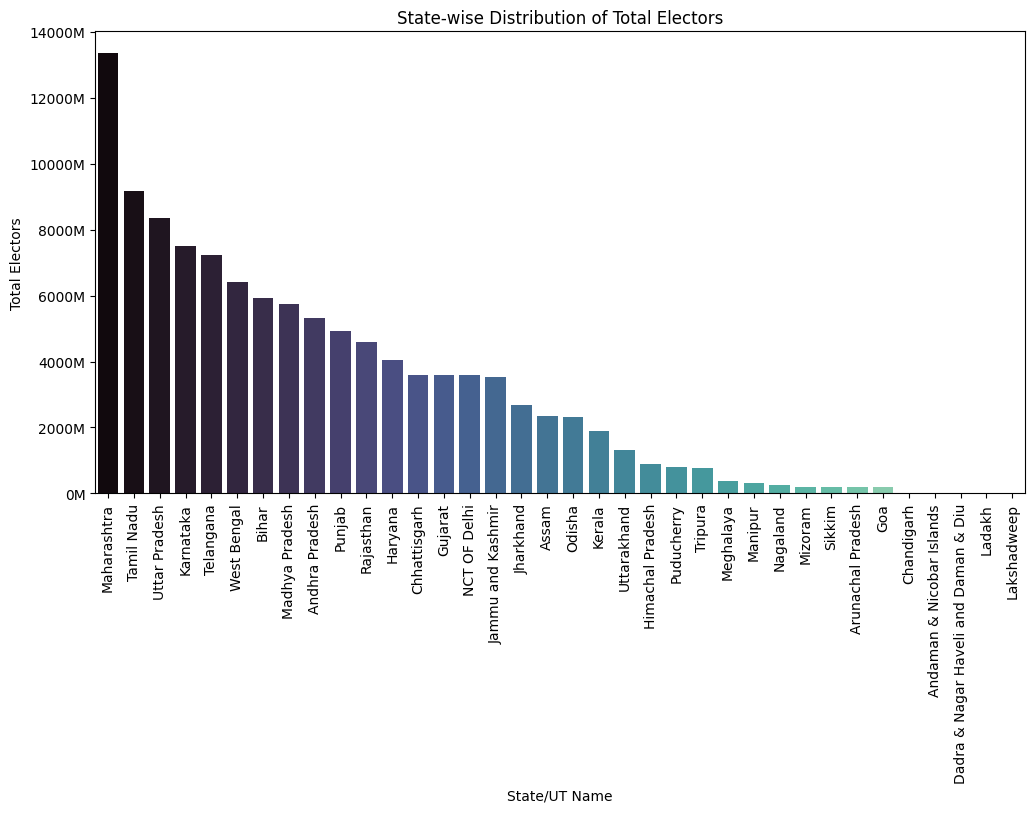

In [134]:
# group by 'State/Ut Name' and calculate the total electors
state_electors = df.groupby('State/Ut Name')['Total Electors In PC'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y=state_electors / 1000000, x=state_electors.index, palette='mako')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}M'))


plt.ylabel('Total Electors')
plt.xlabel('State/UT Name')
plt.title('State-wise Distribution of Total Electors')
plt.xticks(rotation=90)
plt.show()

4. NOTA Impact 

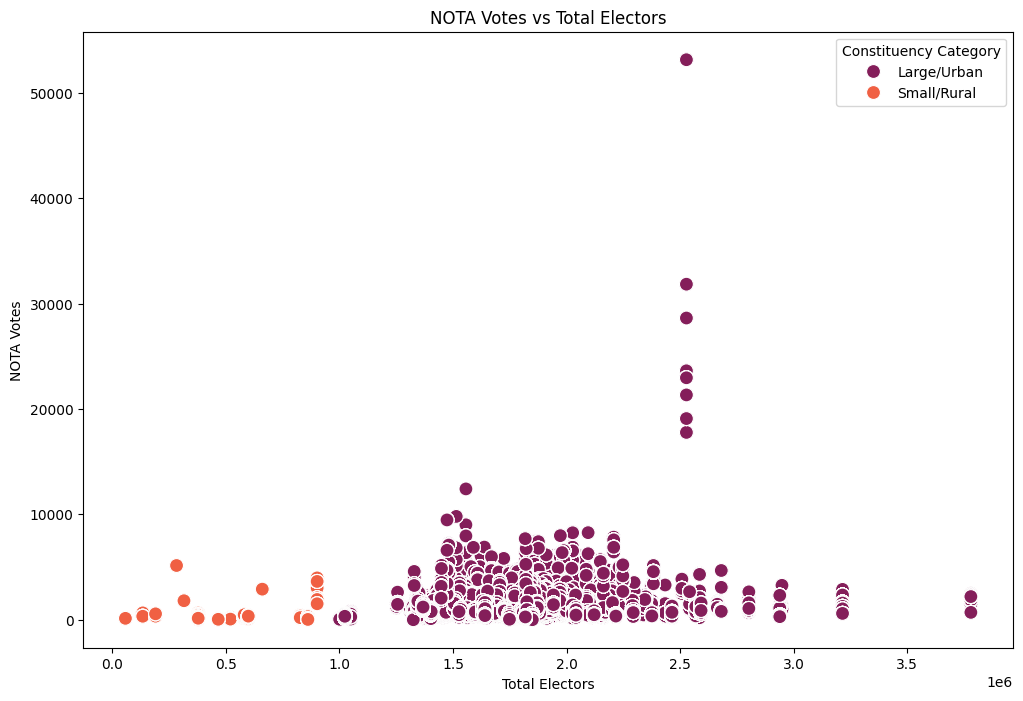

In [ ]:
# NOTA votes vs Total Electors

plt.figure(figsize=(12,8))
sns.scatterplot(data=df,
    x='Total Electors In PC',y='Nota Votes Evm In AC',
    hue='Constituency Category',palette='rocket', s = 100  
)
plt.xlabel('Total Electors')
plt.ylabel('NOTA Votes')
plt.title('NOTA Votes vs Total Electors')
plt.show()

- Constituency with NOTA Impact

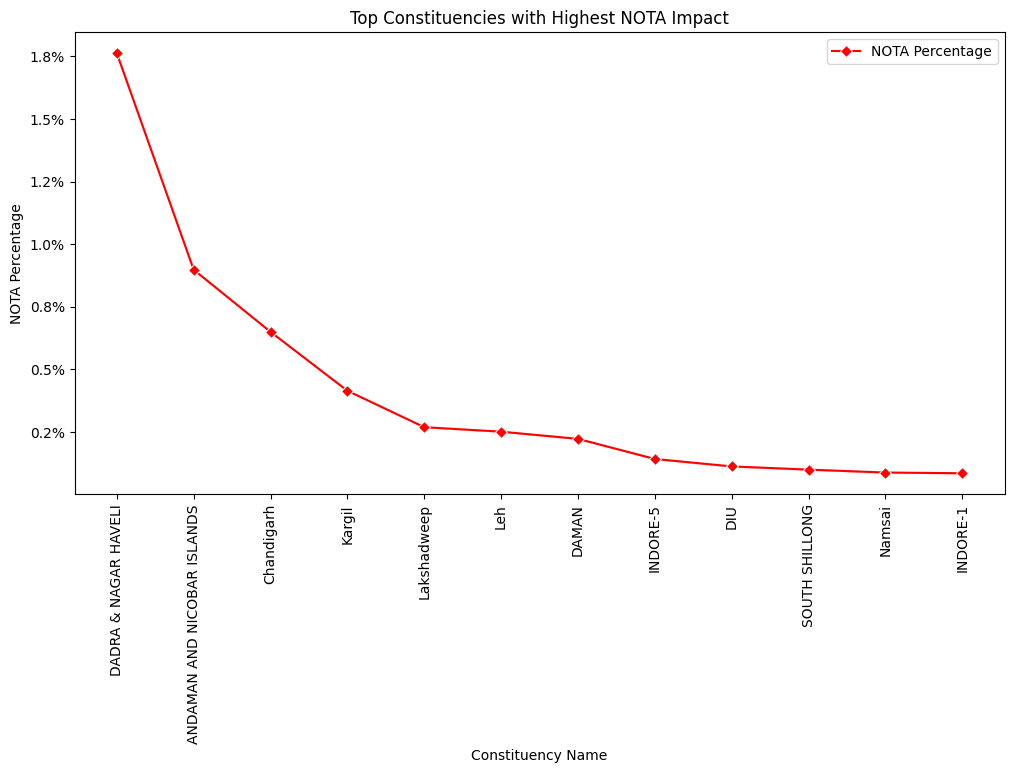

In [136]:
# NOTA percentage for each constituency
df['NOTA Percentage'] = (df['Nota Votes Evm In AC'] / df['Total Valid Votes In State']) * 100

top_nota = df.sort_values(by ='NOTA Percentage', ascending=False).head(100)

plt.figure(figsize=(12,6))
sns.lineplot(data= top_nota,y='NOTA Percentage',x='AC Name', color = 'r' ,marker='D')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}%'))

plt.ylabel('NOTA Percentage')
plt.xlabel('Constituency Name')
plt.title('Top Constituencies with Highest NOTA Impact')
plt.xticks(rotation=90)
plt.legend(['NOTA Percentage'])
plt.show()